In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [224]:
Orders = pd.read_excel('/Users/maomengyun/Documents/Gifting Data/DA-Task (1).xlsx',sheet_name=0)
Users = pd.read_excel('/Users/maomengyun/Documents/Gifting Data/DA-Task (1).xlsx',sheet_name=1)

# 1. Data Cleaning

In [108]:
Orders.shape

(3627, 10)

In [120]:
Users.shape

(2809, 9)

1.1 Missing Value Check

In [8]:
NaN_Orders = Orders.isna().sum().reset_index()
NaN_Orders

,index,0
0,Created Date,0
1,Gift Name,0
2,User ID,0
3,Product,0
4,Upsell Price,0
5,Has Relationship (Yes / No),0
6,Occasion,603
7,Use Case,603


In [86]:
NaN_Users = Users.isna().sum().reset_index()
NaN_Users

,index,0
0,User ID,0
1,Has Contacted Customer Service (Yes / No),0
2,Lifetime Credits Used,2
3,User Status,0
4,Last Platform (No Logo),0
5,Addresses Added,0
6,Relationships Added,0
7,Credit Balance,2
8,Is/Was Trialler (Yes / No),0


1.2 Date Formating

In [225]:
Orders['Month'] = Orders['Created Date'].dt.strftime('%Y-%m')
Orders['Week'] = Orders['Created Date'].dt.strftime('%w')
Orders.head()

,Created Date,Gift Name,User ID,Product,Upsell Price,Has Relationship (Yes / No),Occasion,Use Case,Month,Week
0,2021-02-02,Milk Chocolate &amp; Toffee &quot;Happy Birthd...,45118428,GC,8.49,No,Special Occasions,Happy Birthday,2021-02,2
1,2021-02-02,Chocolate Drop Shortbread Rounds in Tin,42705616,GC,9.99,No,Just Because,Just Because / Miss you / Love,2021-02,2
2,2021-02-02,Dark Chocolate Truffles with Edible Gold Leaf,43451200,GC,14.99,No,Special Occasions,Happy Birthday,2021-02,2
3,2021-02-02,Milk Chocolate &amp; Toffee &quot;Happy Birthd...,38506161,GC,8.49,No,Special Occasions,Happy Birthday,2021-02,2
4,2021-02-02,Milk Chocolate &amp; Toffee &quot;Congrats&quo...,45908630,GC,8.49,No,Just Because,Just Because / Miss you / Love,2021-02,2


1.2 Duplicated Records

In [150]:
Orders.duplicated().sum()

76

In [151]:
#Merge the duplicated records in Orders table by adding the purchase quantity column
#df = Orders.groupby(['Created Date','Gift Name','User ID']).agg(Purchase_Quantity=('User ID','count'))
#Orders = pd.merge(Orders,df,on=['Created Date','Gift Name','User ID'],how='inner')
#Orders = Orders.drop_duplicates().reset_index(drop=True)
#Add 'Amount' Column as the total spending
#Orders['Amount'] = Orders['Upsell Price'] * Orders['Purchase_Quantity']
#Orders.head()

,Created Date,Gift Name,User ID,Product,Upsell Price,Has Relationship (Yes / No),Occasion,Use Case,Month,Week,Purchase_Quantity,Amount
0,2021-02-02,Milk Chocolate &amp; Toffee &quot;Happy Birthd...,45118428,GC,8.49,No,Special Occasions,Happy Birthday,2021-02,2,2,16.98
1,2021-02-02,Chocolate Drop Shortbread Rounds in Tin,42705616,GC,9.99,No,Just Because,Just Because / Miss you / Love,2021-02,2,1,9.99
2,2021-02-02,Dark Chocolate Truffles with Edible Gold Leaf,43451200,GC,14.99,No,Special Occasions,Happy Birthday,2021-02,2,1,14.99
3,2021-02-02,Milk Chocolate &amp; Toffee &quot;Happy Birthd...,38506161,GC,8.49,No,Special Occasions,Happy Birthday,2021-02,2,1,8.49
4,2021-02-02,Milk Chocolate &amp; Toffee &quot;Congrats&quo...,45908630,GC,8.49,No,Just Because,Just Because / Miss you / Love,2021-02,2,1,8.49


In [152]:
Orders.duplicated().sum()

0

In [153]:
Users['User ID'].duplicated().sum()

27

In [226]:
#double records for 27 User ID with both Yes&No in 'Has Contacted Customer Service', drop the 27 records with 'No'
Dup_Users=Users[Users['User ID'].duplicated()==True]

for x in Dup_Users['User ID']:
    Users.loc[Users['User ID'] ==x , 'Has Contacted Customer Service (Yes / No)'] = 'Yes'    
Users=Users.drop_duplicates()
Users['User ID'].duplicated().sum()

0

1.3 Data Validation

In [165]:
Orders.describe(include='all').T

<ipython-input-165-dc6ccffe9715>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Orders.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Created Date,3551,79,2020-12-08 00:00:00,180,2020-11-16,2021-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gift Name,3551,49,Dark Sea Salt Caramel Chocolate Truffles,312,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
User ID,3551.0,NaN,NaN,NaN,NaT,NaT,42430011.587159,9279473.008422,4773.0,39564995.0,42184680.0,44568971.0,180017087.0
Product,3551,2,GC,2315,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Upsell Price,3551.0,NaN,NaN,NaN,NaT,NaT,9.467049,4.450965,3.99,5.99,7.49,13.99,29.99
Has Relationship (Yes / No),3551,2,No,3117,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occasion,2961,5,Just Because,1307,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Use Case,2961,15,Happy Birthday,917,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,3551,4,2020-12,1681,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Week,3551,7,2,632,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
Users.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User ID,2782.0,NaN,NaN,NaN,42379745.657081,8949752.707089,4773.0,39561165.75,42133038.0,44596830.0,180017087.0
Has Contacted Customer Service (Yes / No),2782,2,No,2294,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lifetime Credits Used,2780.0,NaN,NaN,NaN,64.292086,111.778573,0.0,16.0,35.0,72.0,3436.0
User Status,2782,4,Casual,1032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Platform (No Logo),2782,3,iOS,2166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Addresses Added,2782.0,NaN,NaN,NaN,20.358375,22.72682,0.0,7.0,14.0,25.0,323.0
Relationships Added,2782.0,NaN,NaN,NaN,1.13839,4.839002,0.0,0.0,0.0,1.0,139.0
Credit Balance,2780.0,NaN,NaN,NaN,10.740647,28.526044,0.0,2.0,6.0,12.0,1281.0
Is/Was Trialler (Yes / No),2782,2,No,1716,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
Orders.to_csv('/Users/maomengyun/Documents/Gifting Data/DA-Task_Orders.csv')
Users.to_csv('/Users/maomengyun/Documents/Gifting Data/DA-Task_Users.csv')

In [391]:
Orders1 = pd.read_csv('/Users/maomengyun/Documents/Gifting Data/DA-Task_Orders.csv')
Users1 = pd.read_csv('/Users/maomengyun/Documents/Gifting Data/DA-Task_Users.csv')

In [183]:
Orders1.head()

,Unnamed: 0,Created Date,Gift Name,User ID,Product,Upsell Price,Has Relationship (Yes / No),Occasion,Use Case,Month,Week,Purchase_Quantity,Amount
0,0,2021-02-02,Milk Chocolate &amp; Toffee &quot;Happy Birthd...,45118428,GC,8.49,No,Special Occasions,Happy Birthday,2021-02,2,2,16.98
1,1,2021-02-02,Chocolate Drop Shortbread Rounds in Tin,42705616,GC,9.99,No,Just Because,Just Because / Miss you / Love,2021-02,2,1,9.99
2,2,2021-02-02,Dark Chocolate Truffles with Edible Gold Leaf,43451200,GC,14.99,No,Special Occasions,Happy Birthday,2021-02,2,1,14.99
3,3,2021-02-02,Milk Chocolate &amp; Toffee &quot;Happy Birthd...,38506161,GC,8.49,No,Special Occasions,Happy Birthday,2021-02,2,1,8.49
4,4,2021-02-02,Milk Chocolate &amp; Toffee &quot;Congrats&quo...,45908630,GC,8.49,No,Just Because,Just Because / Miss you / Love,2021-02,2,1,8.49


In [234]:
Orders1.shape

(3627, 11)

In [164]:
Users1.shape

(2782, 10)

# 2. GMV Analysis

In [167]:
#Total GMV
round(Orders1['Amount'].sum(),2)

34927.52

In [392]:
#By Month
GMV_Month = Orders1.groupby('Month').agg(GMV=('Upsell Price','sum')).reset_index()
GMV_Month

,Month,GMV
0,2020-11,4880.13
1,2020-12,14443.73
2,2021-01,13822.35
3,2021-02,1136.02


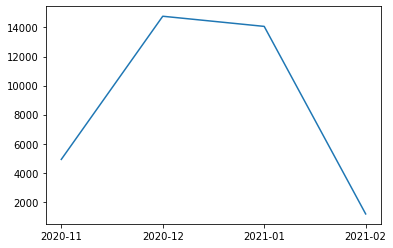

In [169]:
plt.plot(GMV_Month['Month'],GMV_Month['GMV'])
plt.show()

In [65]:
#User Avg.
round(Orders1['Amount'].sum() / Orders1['User ID'].nunique(),2)

12.55

In [67]:
#Order Avg.
round(Orders1['Amount'].sum() / Orders1['Created Date'].count(),2)

9.84

# 3. User Analysis

In [310]:
temp1 = Orders1.groupby('User ID').agg(New_Purchase=('Created Date','count')).reset_index()
NewUsers = Users1.join(temp1.set_index('User ID'), on='User ID') 
NewUsers['Lifetime Credits Used Before 2021-2']=New_Users['Lifetime Credits Used']-New_Users['New_Purchase']
NewUsers=NewUsers[NewUsers['Lifetime Credits Used Before 2021-2']<=0]['User ID'].reset_index()
NewUsers.shape

(50, 2)

In [ ]:
用户数据库分析

In [179]:
#分客户端
User_Platform = Users1.groupby('Last Platform (No Logo)').agg(Count=('User ID','count'), Amount=('Lifetime Credits Used','sum')).reset_index()
User_Platform['Average']=User_Platform['Amount']/User_Platform['Count']
User_Platform


,Last Platform (No Logo),Count,Amount,Average
0,Android,478,27146.0,56.790795
1,Web,138,8973.0,65.021739
2,iOS,2166,142613.0,65.841644


In [180]:
#分会员类型

User_Status = Users1.groupby('User Status').agg(Count=('User ID','count'), Amount=('Lifetime Credits Used','sum')).reset_index()
User_Status['Average']=User_Status['Amount']/User_Status['Count']
User_Status

,User Status,Count,Amount,Average
0,Casual,1032,50723.0,49.150194
1,Churned Trialler,88,5496.0,62.454545
2,Direct Member,684,79174.0,115.751462
3,Trialler to Member,978,43339.0,44.313906


In [330]:
#二八定律分析-结论 58%的客户贡献率了80%的销售额
Users_28 = Orders1.groupby(['User ID']).agg(Total_Amount=('Upsell Price','sum')).sort_values('Total_Amount',ascending=False).reset_index()
Users_28['Amount_cumsum'] = Users_28['Total_Amount'].cumsum()
Users_28

,User ID,Total_Amount,Amount_cumsum
0,44768172,173.88,173.88
1,44762550,108.94,282.82
2,45709230,104.43,387.25
3,42861790,86.94,474.19
4,45578312,79.44,553.63
...,...,...,...
2777,42606202,3.99,34266.27
2778,45606324,3.99,34270.26
2779,42595962,3.99,34274.25
2780,39654872,3.99,34278.24


In [332]:
p = Users_28['Total_Amount'].cumsum()/Users_28['Total_Amount'].sum() 
key = p[p>0.8].index[0] 
key

1615

In [333]:
key / Users_28.shape[0]

0.5805176132278936

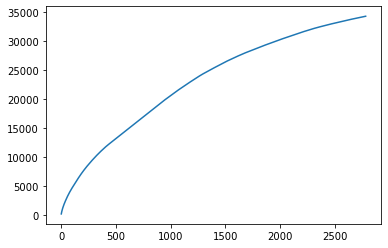

In [336]:
plt.plot(Users_28.index,Users_28['Amount_cumsum'])
plt.show()

In [338]:
#客户消费金额的分位数 用户平均消费金额近似75%分位数,即存在着高消费的客户

Orders1.groupby('User ID').agg(Total_Amount=('Upsell Price','sum')).describe(percentiles=(0.01,0.1,0.25,0.75,0.9,0.99)).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
Total_Amount,2782.0,12.322872,9.585686,3.99,3.99,4.49,6.49,9.99,14.99,20.98,48.1338,173.88


In [341]:
Orders1['Date'] = Orders1['Created Date']
Orders1['Date'] = Orders1.Date.apply(lambda x: x.split(' ')[0])
Orders1['Date'] = pd.to_datetime(Orders1['Date'])

temp5 = Orders1[Orders1['Upsell Price']>0].sort_values('Date').groupby('User ID').apply(lambda x: x['Date'] - x['Date'].shift()).dt.days
temp5

User ID        
4773       1137     NaN
9553       1123     NaN
1746771    2989     NaN
2041409    3244     NaN
           971     44.0
                   ... 
180012775  2207     NaN
180013751  3065     NaN
180016061  3013     NaN
180017087  1069     NaN
           974      2.0
Name: Date, Length: 3627, dtype: float64

In [342]:
#消费了两次及以上的客户有50%的消费周期为14天内,5%为29天内
temp5[temp5>0].describe(percentiles=[0.01,0.1,0.25,0.75,0.9,0.99])


count    591.000000
mean      19.174281
std       15.999102
min        1.000000
1%         1.000000
10%        3.000000
25%        7.000000
50%       14.000000
75%       29.000000
90%       44.000000
99%       63.400000
max       73.000000
Name: Date, dtype: float64

In [364]:
#每月新客户、不活跃客户、回流客户、活跃客户的情况  - 回流--不活跃后第一次活跃即为回流

Pivoted_Amount =Orders1[Orders1['Upsell Price']>0].pivot_table(index='User ID'
                                             ,columns='Month'
                                             ,values='Upsell Price'
                                             ,aggfunc='sum').fillna(0)
columns_month = Pivoted_Amount.columns.astype('str') 
Pivoted_Amount.columns = columns_month
Pivoted_Purchase = Pivoted_Amount.applymap(lambda x:1 if x>0 else 0)
Pivoted_Purchase

Month,2020-11,2020-12,2021-01,2021-02
User ID,,,,
4773,0,0,1,0
9553,0,0,1,0
1746771,0,1,0,0
2041409,1,0,1,0
2705054,0,1,0,0
...,...,...,...,...
180011007,1,0,0,0
180012775,0,1,0,0
180013751,0,1,0,0


In [362]:
def active_status(data):
    status =[]
    for i in range(4):
        #if no purchase made this month
        if data[i] ==0:
            if len(status)>0:  
                if status[i-1]=='Not Registered': #No purchase made last month
                    status.append('Not Registered') 
                else:  #made purchase last month
                    status.append('Not Active')
            else:  #first month
                status.append('Not Registered') #
  
        else:
            if len(status)==0: #first month, new user
                status.append('New User')
            else:  #if not first month
                if status[i-1]=='Not Active':  #Not Active last month, resurrected users this month
                    status.append('Resurrected Users')
                elif status[i-1]=='Not Registered':  #Not Registered last month, New User this month
                    status.append('New User')
                else:  #Active last month, Active this month
                    status.append('Active')
    return pd.Series(status,index=columns_month)

In [366]:
Pivoted_Purchase_Status = Pivoted_Purchase.apply(lambda x:active_status(x),axis=1)
Pivoted_Purchase_Status.head()

Month,2020-11,2020-12,2021-01,2021-02
User ID,,,,
4773,Not Registered,Not Registered,New User,Not Active
9553,Not Registered,Not Registered,New User,Not Active
1746771,Not Registered,New User,Not Active,Not Active
2041409,New User,Not Active,Resurrected Users,Not Active
2705054,Not Registered,New User,Not Active,Not Active


In [368]:
Purchase_Count = Pivoted_Purchase_Status.apply(lambda x:x.value_counts())

Purchase_Count = Purchase_Count[Purchase_Count.index != 'Not Registered']
Purchase_Count = Purchase_Count.fillna(0)

Purchase_Count = Purchase_Count.loc[['New User','Resurrected Users','Active','Not Active'],:]
Purchase_Count

Month,2020-11,2020-12,2021-01,2021-02
New User,486.0,1348.0,889,59.0
Resurrected Users,0.0,0.0,42,13.0
Active,0.0,85.0,161,17.0
Not Active,0.0,401.0,1631,2693.0


In [369]:
bymonth = Orders1.groupby(['Month']).agg(Purchase_Users=('User ID','nunique')).reset_index()
bymonth

,Month,Purchase_Users
0,2020-11,486
1,2020-12,1433
2,2021-01,1092
3,2021-02,89


<AxesSubplot:xlabel='Month'>

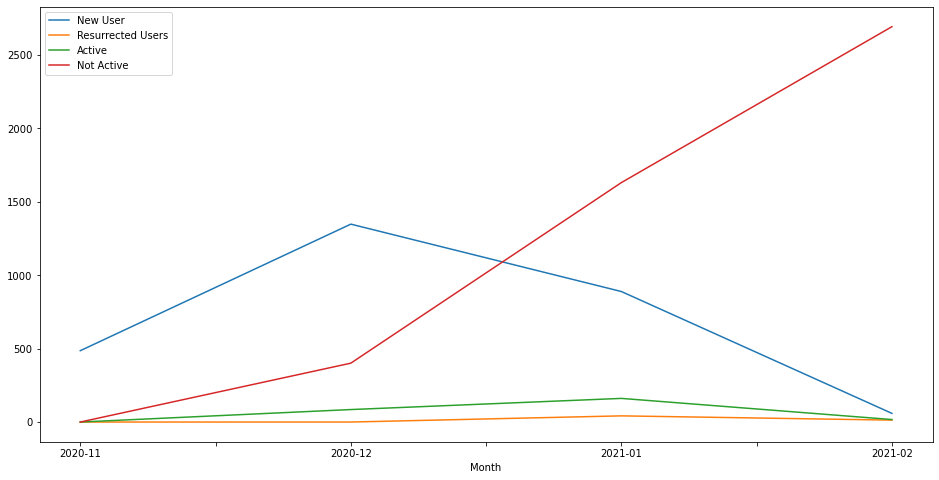

In [370]:
Purchase_Count.T.plot(figsize=(16,8))

# Product Analysis

In [497]:
#按产品名称销量排序

Product = Orders1.groupby(['Gift Name']).agg(Count=('User ID','count')).reset_index().sort_values('Count',ascending=False).reset_index(drop=True)

Product

,Gift Name,Count
0,Dark Sea Salt Caramel Chocolate Truffles,320
1,Pink Marc de Champagne Chocolate Truffles,312
2,Milk Chocolate and Salted Caramel Bar,223
3,Scrumptious Salted Caramel Luxury Fudge Box,199
4,Milk Chocolate and Honeycomb Happy Birthday Bar,194
5,The Captains Kentish Apple &amp; Hazelnut Cookies,192
6,Sea Salted Caramel Shortbread &amp; English Br...,116
7,Grow Your Own Micropub Seed Kit in a matchbox,113
8,Milk Chocolate and Honeycomb Thank You Bar,108
9,Original Toffees in Tin,106


In [379]:
Product.describe(percentiles=(0.01,0.1,0.25,0.75,0.9,0.99))

,Count
count,49.000000
mean,74.020408
std,74.741914
min,4.000000
1%,4.000000
10%,6.800000
25%,20.000000
50%,58.000000
75%,99.000000
90%,192.400000


In [380]:
#按产品名称销售额排序
Product_Amount = Orders1.groupby(['Gift Name']).agg(Amount=('Upsell Price','sum')).reset_index().sort_values('Amount',ascending=False).reset_index(drop=True)

Product_Amount

,Gift Name,Amount
0,Dark Sea Salt Caramel Chocolate Truffles,4796.80
1,Pink Marc de Champagne Chocolate Truffles,4676.88
2,Scrumptious Salted Caramel Luxury Fudge Box,1490.51
3,Sea Salted Caramel Shortbread &amp; English Br...,1448.84
4,A Bit of Everything Selection Chocolate Box,1424.05
5,The Captains Kentish Apple &amp; Hazelnut Cookies,1342.08
6,Belgian Chocolates Selection,1301.07
7,Ultra Thick Dark Chocolate Ginger Biscuits Tin,1028.02
8,Bonsai Trees Growing Kit,1026.21
9,Original Toffees in Tin,952.94


In [381]:
Product_Amount.describe(percentiles=(0.01,0.1,0.25,0.75,0.9,0.99))

,Amount
count,49.000000
mean,699.637347
std,934.356954
min,19.960000
1%,24.760000
10%,87.010000
25%,220.740000
50%,434.710000
75%,869.130000
90%,1358.474000


In [385]:
#按礼物场合销量排序
Product_Occasion = Orders1.groupby(['Occasion']).agg(Count=('User ID','count')).reset_index().sort_values('Count',ascending=False).reset_index(drop=True)

Product_Occasion

,Occasion,Count
0,Just Because,1340
1,Special Occasions,1136
2,Holidays,391
3,Sympathy,144
4,Travel,13


In [387]:
#按礼物场合销售额排序
Product_UseCase = Orders1.groupby(['Use Case']).agg(Count=('User ID','count')).reset_index().sort_values('Count',ascending=False).reset_index(drop=True)

Product_UseCase

,Use Case,Count
0,Happy Birthday,927
1,Just Because / Miss you / Love,922
2,Thank You,413
3,Father's Day,379
4,Congratulations,83
5,Get Well Soon,82
6,Condolences,62
7,New Home,48
8,Anniversary,31
9,Wedding,27


In [388]:
#按单价销量排序
Product_Price = Orders1.groupby(['Upsell Price']).agg(Count=('User ID','count')).reset_index().sort_values('Count',ascending=False).reset_index(drop=True)

Product_Price

,Upsell Price,Count
0,14.99,767
1,4.49,311
2,6.49,292
3,3.99,289
4,6.99,264
5,7.49,251
6,9.99,203
7,5.99,171
8,4.99,146
9,13.99,136


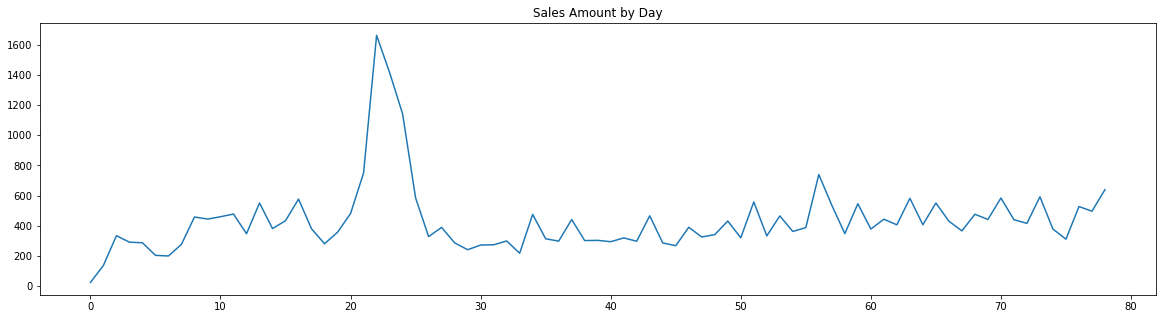

In [400]:
#按日期分析销售额与销量的总体走势

plt.figure(figsize=(20,5))
GMV_byday = Orders1.groupby('Created Date').agg(GMV=('Upsell Price','sum')).reset_index()
GMV_byday

plt.plot(GMV_byday['GMV'])

plt.title('Sales Amount by Day')
plt.show()

In [406]:
amount_rankbyday = GMV_byday.sort_values('Count',ascending=False).reset_index(drop=True)
amount_rankbyday.head()

,Created Date,Count
0,2020-12-08,186
1,2020-12-09,165
2,2020-12-10,143
3,2020-12-07,91
4,2020-12-11,81


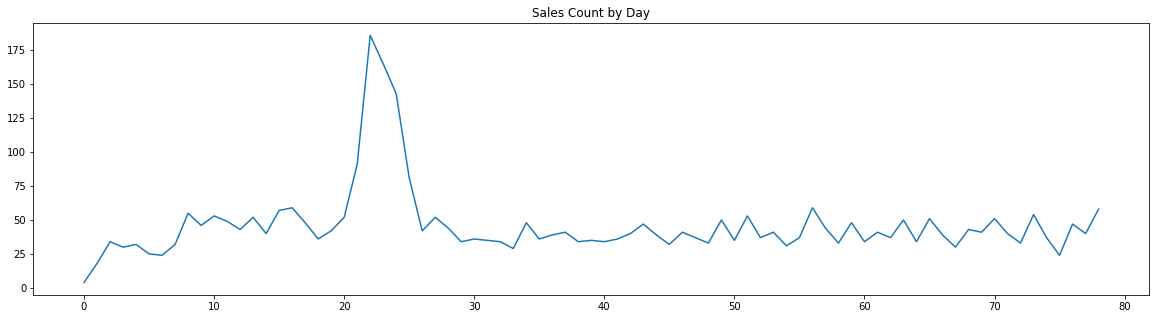

In [405]:
plt.figure(figsize=(20,5))
Count_byday = Orders1.groupby('Created Date').agg(Count=('User ID','count')).reset_index()
Count_byday

plt.plot(Count_byday['Count'])

plt.title('Sales Count by Day')
plt.show()

In [407]:
Count_rankbyday = Count_byday.sort_values('Count',ascending=False).reset_index(drop=True)
Count_rankbyday.head()

,Created Date,Count
0,2020-12-08,186
1,2020-12-09,165
2,2020-12-10,143
3,2020-12-07,91
4,2020-12-11,81


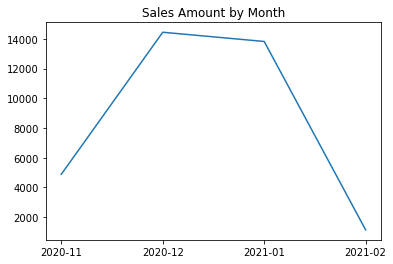

In [409]:
#按月份分析销售额与销量的总体走势
GMV_Month = Orders1.groupby('Month').agg(GMV=('Upsell Price','sum')).reset_index()

plt.plot(GMV_Month['Month'], GMV_Month['GMV'])

plt.title('Sales Amount by Month')
plt.show()

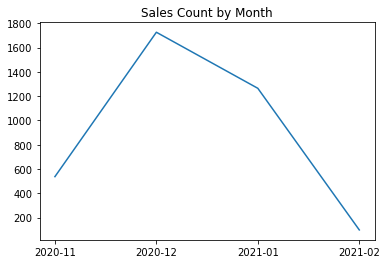

In [410]:
Count_Month = Orders1.groupby('Month').agg(Count=('User ID','count')).reset_index()

plt.plot(Count_Month['Month'], Count_Month['Count'])

plt.title('Sales Count by Month')
plt.show()

In [498]:
User_Group = Orders1.groupby('User ID').agg(First_Month=('Month','min')).reset_index()

user_all = pd.merge(Orders1,User_Group,on='User ID')
user_all['New/Reutrn'] = np.where(user_all['Month']==user_all['First_Month'],'New User','Return User')



In [421]:
#Sales by new users
user_all_new = user_all[user_all['New/Reutrn']=='New User'].groupby('Month').agg(Amount=('Upsell Price','sum'))
user_all_new['Count'] = user_all[user_all['New/Reutrn']=='New User'].groupby('Month').agg(Count=('User ID','count'))
user_all_new

,Amount,Count
Month,,
2020-11,4880.13,537
2020-12,13332.50,1600
2021-01,10924.05,995
2021-02,759.34,66


In [422]:
#Sales by return users
user_all_return = user_all[user_all['New/Reutrn']=='Return User'].groupby('Month').agg(Amount=('Upsell Price','sum'))
user_all_return['Count'] = user_all[user_all['New/Reutrn']=='Return User'].groupby('Month').agg(Count=('User ID','count'))
user_all_return

,Amount,Count
Month,,
2020-12,1111.23,127
2021-01,2898.30,270
2021-02,376.68,32


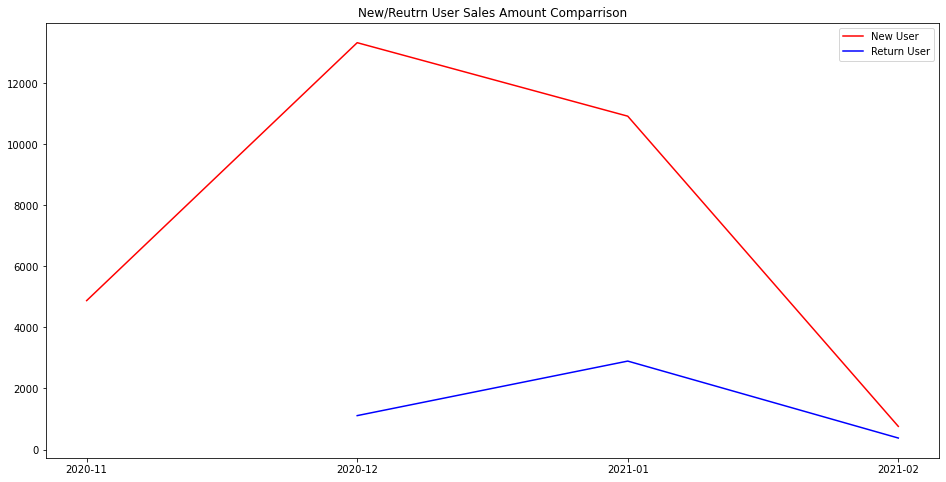

In [424]:
#新客老客的销售额与销量对比
plt.figure(figsize=(16,8))
line1, = plt.plot(user_all_new.index,user_all_new['Amount'],c='r')
line2, = plt.plot(user_all_return.index,user_all_return['Amount'],c='b')
plt.legend([line1,line2],['New User','Return User'])
plt.xticks(user_all_new.index)
plt.title('Sales Amount Comparrison by New/Reutrn User')
plt.show()

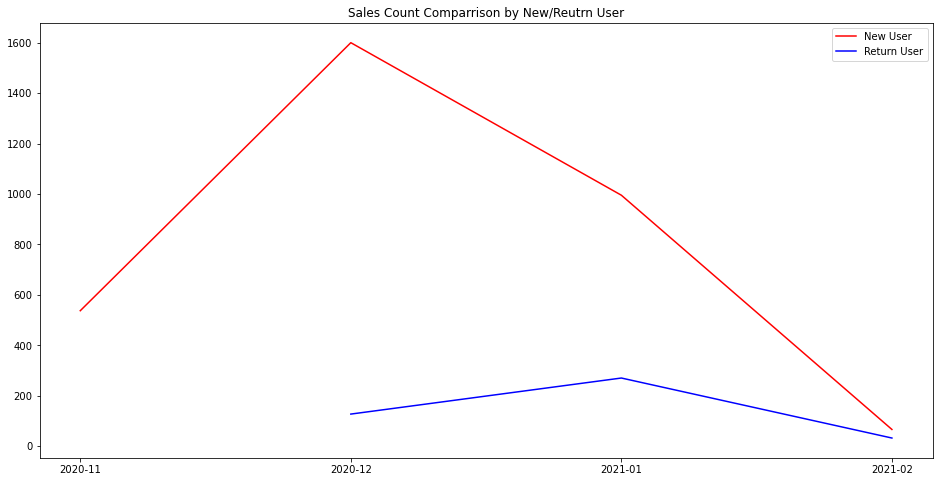

In [426]:
#Sales Count Comparrison
plt.figure(figsize=(16,8))
line1, = plt.plot(user_all_new.index,user_all_new['Count'],c='r')
line2, = plt.plot(user_all_return.index,user_all_return['Count'],c='b')
plt.legend([line1,line2],['New User','Return User'])
plt.xticks(user_all_new.index)
plt.title('Sales Count Comparrison by New/Reutrn User')
plt.show()

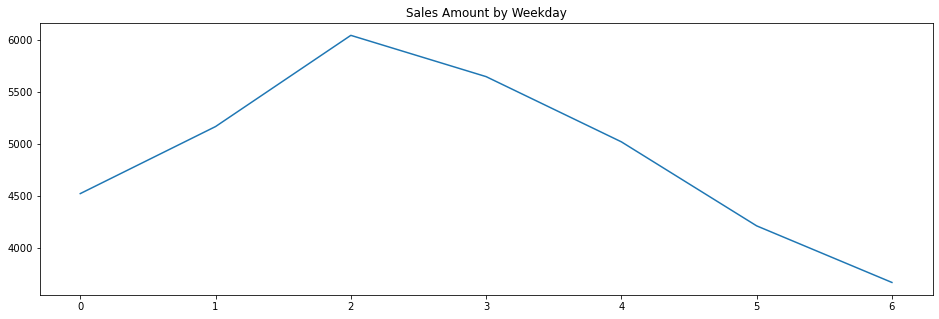

In [429]:
#按周分析销售额与销量的总体走势

orders_weekday = Orders1.groupby('Week').agg(Amount=('Upsell Price','sum'),Count=('User ID','count'))

plt.figure(figsize=(16,5))
plt.plot(orders_weekday.index,orders_weekday['Amount'])
plt.title('Sales Amount by Weekday')
plt.xticks(orders_weekday.index)
plt.show()

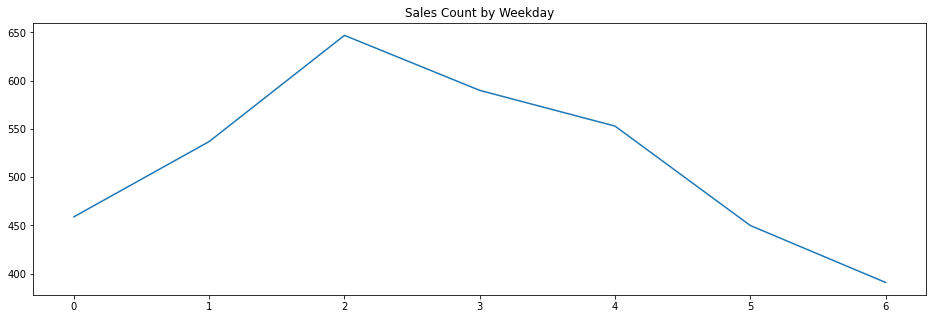

In [431]:
plt.figure(figsize=(16,5))
plt.plot(orders_weekday.index,orders_weekday['Count'])
plt.title('Sales Count by Weekday')
plt.xticks(orders_weekday.index)
plt.show()

In [435]:
#每月新增用户：首次购买即为新增用户

new_user = Orders1.groupby('User ID').agg({'Month':'min'}).reset_index()
new_user.head()



,User ID,Month
0,4773,2021-01
1,9553,2021-01
2,1746771,2020-12
3,2041409,2020-11
4,2705054,2020-12


In [436]:
new_user_month = new_user.groupby('Month').agg(NewUser_Count=('User ID','nunique'))
new_user_month['Pct_Change'] = new_user_month.pct_change()
new_user_month

,NewUser_Count,Pct_Change
Month,,
2020-11,486,NaN
2020-12,1348,1.773663
2021-01,889,-0.340504
2021-02,59,-0.933633


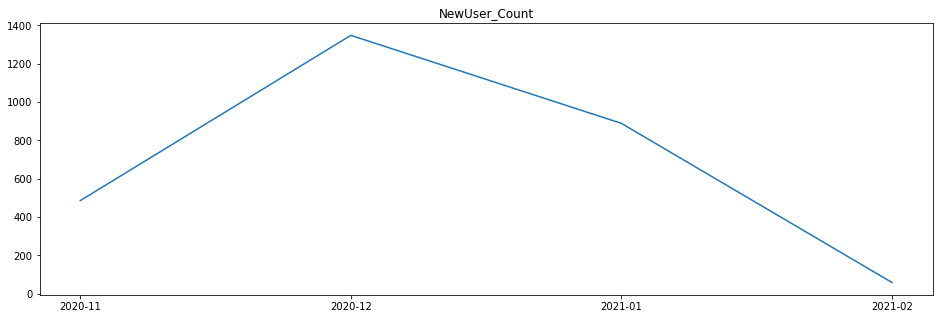

In [437]:
plt.figure(figsize=(16,5))
plt.plot(new_user_month.index,new_user_month['NewUser_Count'])
plt.title('NewUser_Count')
plt.xticks(new_user_month.index)
plt.show()

In [438]:
#当月复购率 = 当月购买次数大于2的用户数/总购买人数 (同一天购买多次视为1次)

Users_Purchase = Orders1.groupby(['Month']).agg(Purchase_Users=('User ID','nunique')).reset_index()

Users_Repurchase = Orders1.groupby(['User ID','Month']).agg(Purchase_Count=('Created Date','nunique')).reset_index()
Users_Repurchase_1=Users_Repurchase[Users_Repurchase['Purchase_Count']>1].groupby(['Month']).agg(Repurchase_Users=('User ID','nunique')).reset_index()


Monthly_Users_Purchase = Users_Repurchase_1.join(Users_Purchase.set_index('Month'), on='Month')
Monthly_Users_Purchase['Repurchase_Users(%)']=round(Monthly_Users_Purchase['Repurchase_Users']/Monthly_Users_Purchase['Purchase_Users'],2)
Monthly_Users_Purchase

,Month,Repurchase_Users,Purchase_Users,Repurchase_Users(%)
0,2020-11,18,486,0.04
1,2020-12,125,1433,0.09
2,2021-01,73,1092,0.07
3,2021-02,2,89,0.02


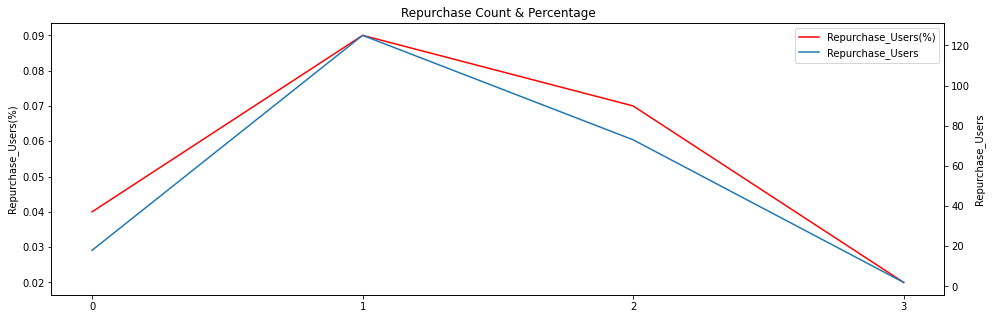

In [439]:
#当月复购率 = 当月购买次数大于2的用户数/总购买人数 (同一天购买多次视为1次)
fig,ax1 = plt.subplots(figsize=(16,5))
line1, = ax1.plot(Monthly_Users_Purchase.index,Monthly_Users_Purchase['Repurchase_Users(%)'],c='r')
ax1.set_ylabel('Repurchase_Users(%)')

ax2 = ax1.twinx() 

line2, = ax2.plot(Monthly_Users_Purchase.index,Monthly_Users_Purchase['Repurchase_Users'])
ax2.set_ylabel('Repurchase_Users')
plt.title('Repurchase Count & Percentage')
plt.xticks(Monthly_Users_Purchase.index)

plt.legend([line1,line2],['Repurchase_Users(%)','Repurchase_Users'])
plt.show()

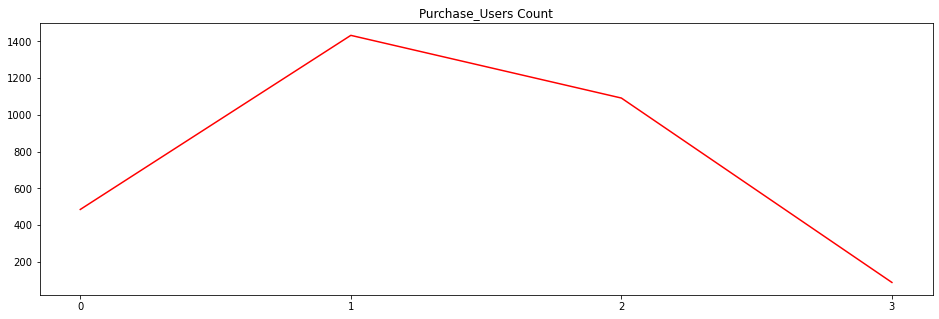

In [441]:
plt.subplots(figsize=(16,5))
plt.plot(Monthly_Users_Purchase.index,Monthly_Users_Purchase['Purchase_Users'],c='r')
plt.title('Purchase_Users Count')
plt.xticks(Monthly_Users_Purchase.index)
plt.show()

In [445]:

data_user = Orders1.groupby('User ID').agg(First_Month=('Month','min')).reset_index()


user = pd.merge(Users_Repurchase,data_user)
user['New/Return'] = np.where(user['Month']==user['First_Month'],'New User','Return User')

user_buy = user[user['New/Return']=='New User'].groupby('Month').agg(NewUser_Count=('User ID','nunique'))

user_buy['ReturnUser_Count'] = user[user['New/Return']=='Return User'].groupby('Month').agg(ReturnUser_Count=('User ID','nunique'))
user_buy = user_buy.fillna(0)
user_buy

,NewUser_Count,ReturnUser_Count
Month,,
2020-11,486,0.0
2020-12,1348,85.0
2021-01,889,203.0
2021-02,59,30.0


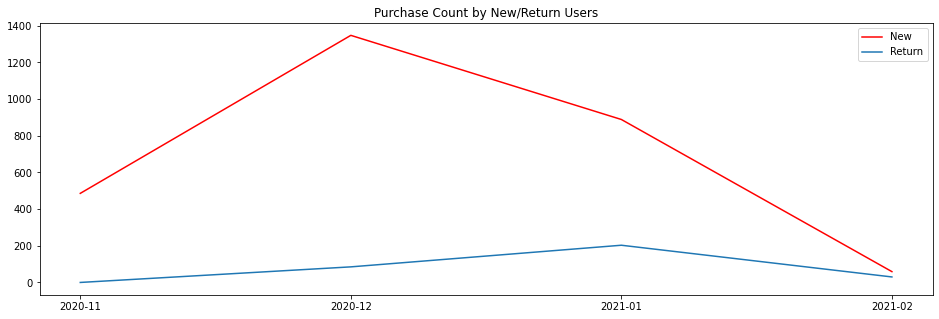

In [446]:
##新老用户下单量
plt.subplots(figsize=(16,5))
line1, = plt.plot(user_buy.index,user_buy['NewUser_Count'],c='r')
line2, = plt.plot(user_buy.index,user_buy['ReturnUser_Count'])
plt.title('Purchase Count by New/Return Users')
plt.xticks(user_buy.index)

plt.legend([line1,line2],['New','Return'])
plt.show()

In [447]:
Purchase_Count = Purchase_Count.T
Purchase_Count['Return User'] = Purchase_Count.sum(axis=1) - Purchase_Count['New User']
Purchase_Count['Repurchase'] = Purchase_Count['Resurrected Users'] + Purchase_Count['Active']
Purchase_Count['Repurchase(%)'] = Purchase_Count['Repurchase'] / Purchase_Count['Return User']
Purchase_Count




,New User,Resurrected Users,Active,Not Active,Return User,Repurchase,Repurchase(%)
Month,,,,,,,
2020-11,486.0,0.0,0.0,0.0,0.0,0.0,NaN
2020-12,1348.0,0.0,85.0,401.0,486.0,85.0,0.174897
2021-01,889.0,42.0,161.0,1631.0,1834.0,203.0,0.110687
2021-02,59.0,13.0,17.0,2693.0,2723.0,30.0,0.011017


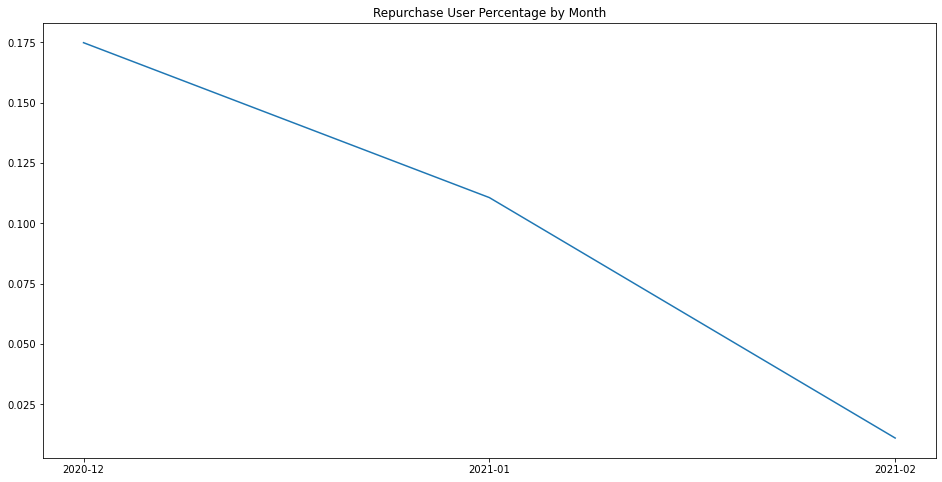

In [450]:
plt.figure(figsize=(16,8))
plt.plot(Purchase_Count.index,Purchase_Count['Repurchase(%)'])
plt.title('Repurchase User Percentage by Month')
plt.show()

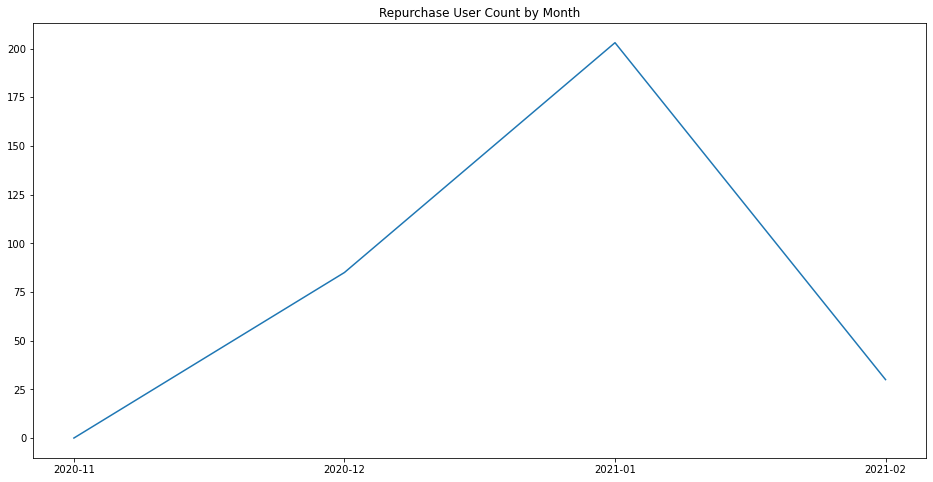

In [451]:
plt.figure(figsize=(16,8))
plt.plot(Purchase_Count.index,Purchase_Count['Repurchase'])
plt.title('Repurchase User Count by Month')
plt.show()

In [499]:
data_user = Orders1.groupby('User ID').agg(First_Month=('Month','min')).reset_index()


user = pd.merge(Users_Repurchase,data_user)
user['New/Return'] = np.where(user['Month']==user['First_Month'],'New User','Return User')

user_2 = user[user['Purchase_Count'] >= 2]
user_repurchase = user_2[user_2['New/Return']=='New User'].groupby('Month').agg(Repurchase_NewUser_Count=('User ID','nunique'))


In [500]:
user_repurchase['Repurchase_ReturnUser_Count'] = user_2[user_2['New/Return']=='Return User'].groupby('Month').agg(Repurchase_ReturnUser_Count=('User ID','nunique'))
user_repurchase = user_repurchase.fillna(0)
user_repurchase['Repurchase_ReturnUser_Count']  = user_repurchase['Repurchase_ReturnUser_Count'].astype('int')

In [469]:
user_repurchase=user_repurchase.reset_index()

user_repurchase['Repurchase_Users_Count'] = Users_Repurchase_1['Repurchase_Users']
user_repurchase['Repurchase_NewUser(%)'] = user_repurchase['Repurchase_NewUser_Count'] / user_repurchase['Repurchase_Users_Count']
user_repurchase['Repurchase_ReturnUser(%)'] = user_repurchase['Repurchase_ReturnUser_Count'] / user_repurchase['Repurchase_Users_Count']

In [471]:
#新老用户回购率（按月）
user_repurchase

,Month,Repurchase_NewUser_Count,Repurchase_ReturnUser_Count,Repurchase_Users_Count,Repurchase_NewUser(%),Repurchase_ReturnUser(%)
0,2020-11,18,0,18,1.000000,0.000000
1,2020-12,105,20,125,0.840000,0.160000
2,2021-01,45,28,73,0.616438,0.383562
3,2021-02,1,1,2,0.500000,0.500000


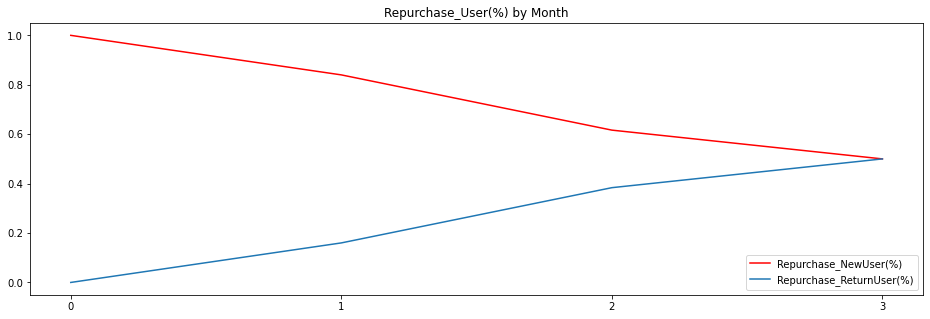

In [472]:
##新老用户回购率（按月）
plt.subplots(figsize=(16,5))
line1, = plt.plot(user_repurchase.index,user_repurchase['Repurchase_NewUser(%)'],c='r')
line2, = plt.plot(user_repurchase.index,user_repurchase['Repurchase_ReturnUser(%)'])
plt.title('Repurchase_User(%) by Month')
plt.xticks(user_repurchase.index)
plt.legend([line1,line2],['Repurchase_NewUser(%)','Repurchase_ReturnUser(%)'],loc=4)
plt.show()

# RFM模型

In [501]:
user_rfm = Orders1.groupby(['User ID','Created Date']).agg(Amount=('Upsell Price','sum')).reset_index()


In [503]:
user_rfm = user_rfm.groupby('User ID').agg(Last_Date=('Created Date','max')
                                           ,M=('Amount','sum')
                                           ,F=('Created Date','count')
                                          ).reset_index()


In [483]:
user_rfm['Last_Date'] = pd.to_datetime(user_rfm['Last_Date'])
user_rfm['R'] = user_rfm['Last_Date'].apply(lambda x:user_rfm['Last_Date'].max() - x)
user_rfm['R'] = user_rfm['R'].dt.days
user_rfm = user_rfm[['User ID','R','F','M']]
user_rfm

,User ID,R,F,M
0,4773,27,1,12.99
1,9553,27,1,9.99
2,1746771,62,1,14.99
3,2041409,23,2,22.48
4,2705054,56,1,5.49
...,...,...,...,...
2777,180011007,68,1,12.98
2778,180012775,53,1,5.99
2779,180013751,63,1,4.49
2780,180016061,62,1,14.99


In [484]:
user_rfm['User ID'] = user_rfm['User ID'].astype('object')
user_rfm.describe(percentiles=(0.01,0.1,0.25,0.75,0.9,0.95,0.99)).T

<ipython-input-484-b87704240013>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_rfm['User ID'] = user_rfm['User ID'].astype('object')


,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
R,2782.0,38.285406,22.070507,0.00,0.00,7.00,19.00,41.00,56.00,66.00,70.00,76.0000,78.00
F,2782.0,1.212437,0.621284,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,4.0000,8.00
M,2782.0,12.322872,9.585686,3.99,3.99,4.49,6.49,9.99,14.99,20.98,29.98,48.1338,173.88


In [485]:
rfm_score = user_rfm.copy()

for i,j in enumerate(rfm_score['R']):
    if j <= 30:
        rfm_score['R'][i] = 5
    elif j <= 60:
        rfm_score['R'][i] = 4
    elif j <= 90:
        rfm_score['R'][i] = 3
    elif j <= 120:
        rfm_score['R'][i] = 2
    else :
        rfm_score['R'][i] = 1
        

for i,j in enumerate(rfm_score['F']):
    if j <= 1:
        rfm_score['F'][i] = 1
    elif j <= 2:
        rfm_score['F'][i] = 2
    elif j <= 3:
        rfm_score['F'][i] = 3
    elif j <= 4:
        rfm_score['F'][i] = 4
    else :
        rfm_score['F'][i] = 5

for i,j in enumerate(rfm_score['M']):
    if j <= 200:
        rfm_score['M'][i] = 1
    elif j <= 500:
        rfm_score['M'][i] = 2
    elif j <= 1000:
        rfm_score['M'][i] = 3
    elif j <= 2000:
        rfm_score['M'][i] = 4
    else :
        rfm_score['M'][i] = 5

<ipython-input-485-4130591e44f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_score['R'][i] = 5
<ipython-input-485-4130591e44f7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_score['R'][i] = 3
<ipython-input-485-4130591e44f7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_score['R'][i] = 4
<ipython-input-485-4130591e44f7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [486]:
rfm_score

,User ID,R,F,M
0,4773,5,1,1.0
1,9553,5,1,1.0
2,1746771,3,1,1.0
3,2041409,5,2,1.0
4,2705054,4,1,1.0
...,...,...,...,...
2777,180011007,3,1,1.0
2778,180012775,4,1,1.0
2779,180013751,3,1,1.0
2780,180016061,3,1,1.0


In [506]:
rfm = pd.DataFrame()
rfm['User ID'] = rfm_score['User ID']
rfm['R'] = rfm_score['R'].apply(lambda x: '1' if x >= rfm_score['R'].mean() else '0')
rfm['F'] = rfm_score['F'].apply(lambda x: '1' if x >= rfm_score['F'].mean() else '0')
rfm['M'] = rfm_score['M'].apply(lambda x: '1' if x >= rfm_score['M'].mean() else '0')

rfm['result'] = rfm['R'] + rfm['F'] + rfm['M']
rfm

,User ID,R,F,M,result
0,4773,1,0,1,101
1,9553,1,0,1,101
2,1746771,0,0,1,001
3,2041409,1,1,1,111
4,2705054,0,0,1,001
...,...,...,...,...,...
2777,180011007,0,0,1,001
2778,180012775,0,0,1,001
2779,180013751,0,0,1,001
2780,180016061,0,0,1,001


In [507]:
for i,j in enumerate(rfm['result']):
    if j == '111':
        rfm['result'][i] = 'a重要价值客户'
    elif j == '101':
        rfm['result'][i] = 'b重要发展客户'
    elif j == '011':
        rfm['result'][i] = 'c重要保持客户'
    elif j == '001':
        rfm['result'][i] = 'd重要挽留客户'
    elif j == '110':
        rfm['result'][i] = 'e一般价值客户'
    elif j == '100':
        rfm['result'][i] = 'f一般发展客户'
    elif j == '010':
        rfm['result'][i] = 'g一般保持客户'
    elif j == '000':
        rfm['result'][i] = 'h一般挽留客户'

In [508]:
rfm = rfm[['User ID','result']]
rfm

,User ID,result
0,4773,b重要发展客户
1,9553,b重要发展客户
2,1746771,d重要挽留客户
3,2041409,a重要价值客户
4,2705054,d重要挽留客户
...,...,...
2777,180011007,d重要挽留客户
2778,180012775,d重要挽留客户
2779,180013751,d重要挽留客户
2780,180016061,d重要挽留客户


In [516]:
df1 = rfm.groupby('result').agg(Count=('User ID','count')).reset_index()
df1

,result,Count
0,a重要价值客户,251
1,b重要发展客户,850
2,c重要保持客户,164
3,d重要挽留客户,1517


<function matplotlib.pyplot.show(close=None, block=None)>

/Users/maomengyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 37325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/maomengyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/maomengyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/maomengyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/maomengyun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23458 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/maomengyun/opt/anaconda3/lib/pyth

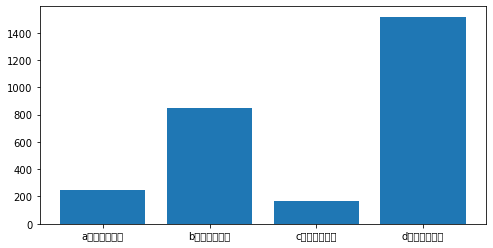

In [517]:
plt.figure(figsize=(8,4))
plt.bar(df1['result'], df1['Count'])

plt.show